### 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

import os
os.chdir('/home/piai/실습파일/BigData분석')

In [2]:
df_raw = pd.read_csv('통신고객이탈.csv', encoding = 'euc-kr')
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


참고. 데이터셋 용어 정리  

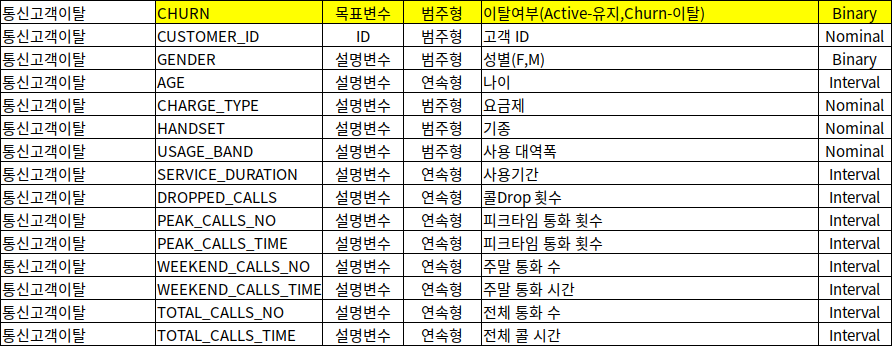

# 1. 데이터 전처리

### 1-1. 7일차 과제 중 전처리 파트를 가져옴

In [3]:
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [4]:
df_raw['CHURN'] = df_raw['CHURN'].map({'Active': 0, 'Churned': 1})
df_raw = df_raw.drop(columns = 'CUSTOMER_ID')

In [5]:
df_raw['CHURN'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
925    1
926    1
927    1
928    1
929    1
Name: CHURN, Length: 930, dtype: int64

### 1-2. 데이터 분할

In [6]:
df_train, df_test = train_test_split(df_raw,
                                    test_size = 0.3,
                                    random_state = 990829)

print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))

train data size:(651, 14)
test data size:(279, 14)


In [7]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
df_raw_x = df_raw_dummy.drop(columns=["CHURN"] , axis = 1)
df_raw_y = df_raw_dummy["CHURN"] 

In [9]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 990829) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (930, 33)
분할 후 설명변수 데이터 :Train (651, 33)   Test (279, 33)


In [10]:
gb_uncust = GradientBoostingClassifier(random_state=990829)
gb_uncust.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.965
Accuracy on test set: 0.878


In [11]:
print(gb_uncust.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 990829, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


# 2. 모델 파라미터 조절에 따른 성능 비교 (Gradient Boosting)

### 2-1. Learning_Rate (학습률)에 따른 성능 비교
- 과대적합을 피하고자 학습률 0.7로 지정

In [12]:
train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 990829)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [13]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.965,0.878
1,0.2,0.997,0.875
2,0.3,1.000,0.885
3,0.4,1.000,0.867
4,0.5,1.000,0.871
5,0.6,1.000,0.860
6,0.7,1.000,0.885
7,0.8,1.000,0.892
8,0.9,1.000,0.882


### 2-2. n-estimator 에 따른 성능 비교
- 모델의 정확도를 고려하여 n_estimators = 50 선택

In [14]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.7, random_state= 990829)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [15]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.954,0.882
1,20,0.986,0.878
2,30,0.995,0.878
3,40,1.000,0.878
4,50,1.000,0.878
5,60,1.000,0.882
6,70,1.000,0.878
7,80,1.000,0.860
8,90,1.000,0.860
9,100,1.000,0.875


### 2-3. max_depth에 따른 성능 비교
- Train / Test 정확도 고려하여 Depth = 6 선택

In [16]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=50, learning_rate=0.7, random_state= 990829)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [17]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.925,0.882
1,2,0.988,0.860
2,3,1.000,0.878
3,4,1.000,0.892
4,5,1.000,0.864
5,6,1.000,0.889
6,7,1.000,0.885
7,8,1.000,0.878
8,9,1.000,0.871
9,10,1.000,0.882


### 2-4. min_samples_split 에 따른 성능 비교
- training set에 대한 성능이 떨어졌지만, test set의 과적합을 피하기 위해, min_samples_split = 80 선택

In [18]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=6, n_estimators=50, learning_rate=0.7, random_state=990829)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [19]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,1.0,0.878
1,30,1.0,0.889
2,40,1.0,0.878
3,50,1.0,0.900
4,60,1.0,0.892
5,70,1.0,0.878
6,80,1.0,0.882
7,90,1.0,0.882
8,100,1.0,0.882


#### 2-5. min_samples_leaf: leaf 수 변경에 따른 모델 성능
- Train / Test 정확도 고려하여 min_samples_leaf = 5 선택

In [20]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=6, n_estimators=50, learning_rate=0.7, min_samples_split=80, random_state=990829)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [21]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,1.0,0.889
1,10,1.0,0.882
2,15,1.0,0.878
3,20,1.0,0.882
4,25,1.0,0.882
5,30,1.0,0.860
6,35,1.0,0.857
7,40,1.0,0.824
8,45,1.0,0.821
9,50,1.0,0.817


# 3. 결론 도출 (Gradient Boosting)

### 3-1. 최종 모델 선택

#### Gradient Boosting 분석 결과,

1. precision, recall, f1-score 각각  
 - 0 에 대해 0.906, 0.950, 0.927  
 - 1 에 대해 0.761, 0.614, 0.680 
 으로 나타났다.
 - 이는 모델이 0에 대해서는 잘 예측하고 맞추는 반면, 1에 대해서는 비교적 예측성능이 떨어진다는 것으로 보이는 듯하다. 그러나 이는 모델이 불균형 데이터를 학습하여, 0으로 예측하는 경향이 커졌기 때문일 수 있다. 따라서 1에 대한 모델의 예측 성능이 개선될수록 0에 대한 예측성능은 낮아질 가능성이 있다.
 
2. accuracy = 0.882
- 전체의 0, 1을 약 88%으로 확률로 모델이 잘 구분하는 것을 알 수 있다.

In [22]:
gb_final = GradientBoostingClassifier(min_samples_leaf=5, min_samples_split=80,  max_depth=6, n_estimators=60, learning_rate=0.7, 
                                      random_state=990829)
gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 1.000
Test Accuracy: 0.882

Test Confusion matrix: 
[[211  11]
 [ 22  35]]
              precision    recall  f1-score   support

           0      0.906     0.950     0.927       222
           1      0.761     0.614     0.680        57

    accuracy                          0.882       279
   macro avg      0.833     0.782     0.804       279
weighted avg      0.876     0.882     0.877       279



### 3-2. 최종변수 중요도

- 트리 생성시 중요하게 여겨지는 변수들은 아래와 같다. HANDSET_ASAD90, DROPPED_CALLS, HANDSET_CAS30등이 순서대로 중요하다고 나타났다.

In [23]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3).head()

,Feature,Importance
17,HANDSET_ASAD90,0.180
2,DROPPED_CALLS,0.170
20,HANDSET_CAS30,0.162
4,PEAK_CALLS_TIME,0.113
8,TOTAL_CALLS_TIME,0.069


Text(0, 0.5, '설명변수')

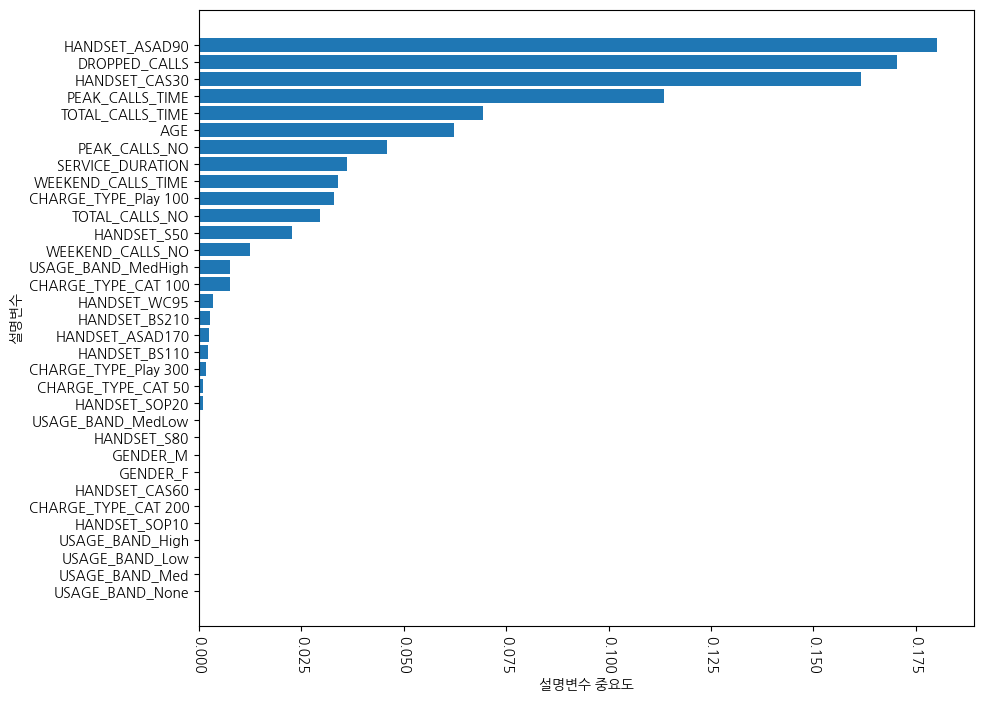

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.xticks(rotation=-90)
plt.ylabel("설명변수")

# 4. 파라미터 조절에 따른 성능 비교 (XG BOOST)

In [25]:
!pip install xgboost

- 다음은 결과를 확인하기 위한 사용자 함수이다.

In [26]:
from xgboost import XGBClassifier
from xgboost import plot_importance

def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))


- default XGB모델

In [27]:
xgboost_uncust = XGBClassifier(random_state=990829)

xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=990829, ...)

- 파라미터를 조정하지 않은 기본모델은 Training 데이터 셋에 대해 완벽히 분류를 수행하는 성능을 보였다. 이는 과적합될 가능성이 큰 것으로 보여지며, 실제로도 Test 데이터셋에 대하여 1(참 값, 관심이 있는 값)에 대하여 정밀도(참값 중 실제로 참으로 잘 예측한 비율), 재현율(참으로 예측한 것들 중 실제로 참으로 잘 맞춘 비율)이 많이 낮아졌고, 이에 따라 정확도 또한 낮아진 것을 확인할 수 있다.

In [28]:
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
xgb_pred_train = xgboost_uncust.predict(df_train_x)
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
xgb_pred_test = xgboost_uncust.predict(df_test_x)
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[528   0]
 [  0 123]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[211  11]
 [ 23  34]] 

정확도: 0.8781
정밀도: 0.7556
재현율: 0.5965
F1    : 0.6667
AUC   : 0.7735


- 다음은 파라미터가 조정된 후의 XGB 모델의 성능이다. 반복 수(n_estimator)는 100회, 학습률(learning_rate)는 0.1, 트리의 최대 깊이(max_depth)는 5회로 임의로 선정하였으며, Training 데이터셋에 대해선 성능이 내려갔지만, Test 데이터 셋에 대해서는 성능이 향상되지 않았음을 볼 수 있다.  
이는 과적합을 해결하기 위한 과정에서 Training 데이터 셋에 대한 성능이 내려간 것이 아닌, 모델의 파라미터가 조정되면서 Training 데이터 셋에 대한 설명력이 부족해졌음을 나타낸다.

In [29]:
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=990829)
xgboost_user.fit(df_train_x, df_train_y)

xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[527   1]
 [  9 114]] 

정확도: 0.9846
정밀도: 0.9913
재현율: 0.9268
F1    : 0.9580
AUC   : 0.9625

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       528
           1       0.99      0.93      0.96       123

    accuracy                           0.98       651
   macro avg       0.99      0.96      0.97       651
weighted avg       0.98      0.98      0.98       651


 사용자 모델 평가 : Test 

오차행렬:
 [[213   9]
 [ 24  33]] 

정확도: 0.8817
정밀도: 0.7857
재현율: 0.5789
F1    : 0.6667
AUC   : 0.7692

               precision    recall  f1-score   support

           0       0.90      0.96      0.93       222
           1       0.79      0.58      0.67        57

    accuracy                           0.88       279
   macro avg       0.84      0.77      0.80       279
weighted avg       0.88      0.88      0.87       279



- 한 번 조정된 파라미터의 모델이 더 나은 성능을 보이지 못해, 반복 수(n_estimators)를 늘리고, 트리의 최대 깊이 또한 6으로 변경하였다. 또한 추가된 파라미터 조정으로 인한 Training 데이터 셋에 대해 과적합을 방지하기 위해, early_stopping_rounds를 설정하였다.

In [30]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=990829)
xgb_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150, eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.46958
[1]	validation_0-logloss:0.44135
[2]	validation_0-logloss:0.41768
[3]	validation_0-logloss:0.39781
[4]	validation_0-logloss:0.38278
[5]	validation_0-logloss:0.37156
[6]	validation_0-logloss:0.36038
[7]	validation_0-logloss:0.34977
[8]	validation_0-logloss:0.33844
[9]	validation_0-logloss:0.33043
[10]	validation_0-logloss:0.32321
[11]	validation_0-logloss:0.31749
[12]	validation_0-logloss:0.31127
[13]	validation_0-logloss:0.30751
[14]	validation_0-logloss:0.30497
[15]	validation_0-logloss:0.30094
[16]	validation_0-logloss:0.29570


/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-logloss:0.29441
[18]	validation_0-logloss:0.29179
[19]	validation_0-logloss:0.28939
[20]	validation_0-logloss:0.28744
[21]	validation_0-logloss:0.28659
[22]	validation_0-logloss:0.28414
[23]	validation_0-logloss:0.28271
[24]	validation_0-logloss:0.28165
[25]	validation_0-logloss:0.28134
[26]	validation_0-logloss:0.27947
[27]	validation_0-logloss:0.27777
[28]	validation_0-logloss:0.27809
[29]	validation_0-logloss:0.27778
[30]	validation_0-logloss:0.27663
[31]	validation_0-logloss:0.27561
[32]	validation_0-logloss:0.27505
[33]	validation_0-logloss:0.27467
[34]	validation_0-logloss:0.27365
[35]	validation_0-logloss:0.27284
[36]	validation_0-logloss:0.27331
[37]	validation_0-logloss:0.27319
[38]	validation_0-logloss:0.27382
[39]	validation_0-logloss:0.27318
[40]	validation_0-logloss:0.27467
[41]	validation_0-logloss:0.27413
[42]	validation_0-logloss:0.27351
[43]	validation_0-logloss:0.27567
[44]	validation_0-logloss:0.27573
[45]	validation_0-logloss:0.27604
[46]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=990829, ...)

- 반복 수의 최적은 35회였으며, 최적은 평가지표인 zero-logloss가 가장 작은 시점을 확인하여 선택할 수 있다.

In [31]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)

최적 횟수: 35
최적 성능(0-LogLoss): 0.27283942978829145


#### 최적 XG BOOST 분석 결과,

1. precision, recall, f1-score 각각  
 - 0 에 대해 0.90, 0.960, 0.93  
 - 1 에 대해 0.80, 0.56, 0.66 
 으로 나타났다.
 
2. accuracy = 0.882
- 전체의 0, 1을 약 88%으로 확률로 모델이 잘 구분하는 것을 알 수 있다.

In [32]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[214   8]
 [ 25  32]] 

정확도: 0.8817
정밀도: 0.8000
재현율: 0.5614
F1    : 0.6598
AUC   : 0.7627

               precision    recall  f1-score   support

           0       0.90      0.96      0.93       222
           1       0.80      0.56      0.66        57

    accuracy                           0.88       279
   macro avg       0.85      0.76      0.79       279
weighted avg       0.88      0.88      0.87       279



- WEEKEND_CALLS_TIMTE 변수가 220의 값으로 가장 영향력이 큰 중요변수로 생각되고. 다음으로 AGE, PEOK_CALLS_NO, TOTAL_CALLS_TIME 등이 유의할 것으로 생각된다. 반면에 CHARGE_TYPE_Play 300, CHARGE_TYPE_CAT_200 HANDSET_SOP10은 설명변수의 중요도가 매우 낮아 모델의 예측성능에 큰 영향을 미치지 않을 것으로 생각된다.

{'AGE': 220.0, 'SERVICE_DURATION': 188.0, 'DROPPED_CALLS': 131.0, 'PEAK_CALLS_NO': 216.0, 'PEAK_CALLS_TIME': 198.0, 'WEEKEND_CALLS_NO': 142.0, 'WEEKEND_CALLS_TIME': 238.0, 'TOTAL_CALLS_NO': 190.0, 'TOTAL_CALLS_TIME': 203.0, 'GENDER_F': 28.0, 'CHARGE_TYPE_CAT 100': 22.0, 'CHARGE_TYPE_CAT 200': 3.0, 'CHARGE_TYPE_Play 100': 45.0, 'CHARGE_TYPE_Play 300': 3.0, 'HANDSET_ASAD170': 22.0, 'HANDSET_ASAD90': 82.0, 'HANDSET_BS110': 28.0, 'HANDSET_BS210': 24.0, 'HANDSET_CAS30': 77.0, 'HANDSET_S50': 49.0, 'HANDSET_S80': 14.0, 'HANDSET_SOP10': 1.0, 'HANDSET_WC95': 21.0, 'USAGE_BAND_Med': 8.0, 'USAGE_BAND_MedHigh': 33.0, 'USAGE_BAND_MedLow': 15.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

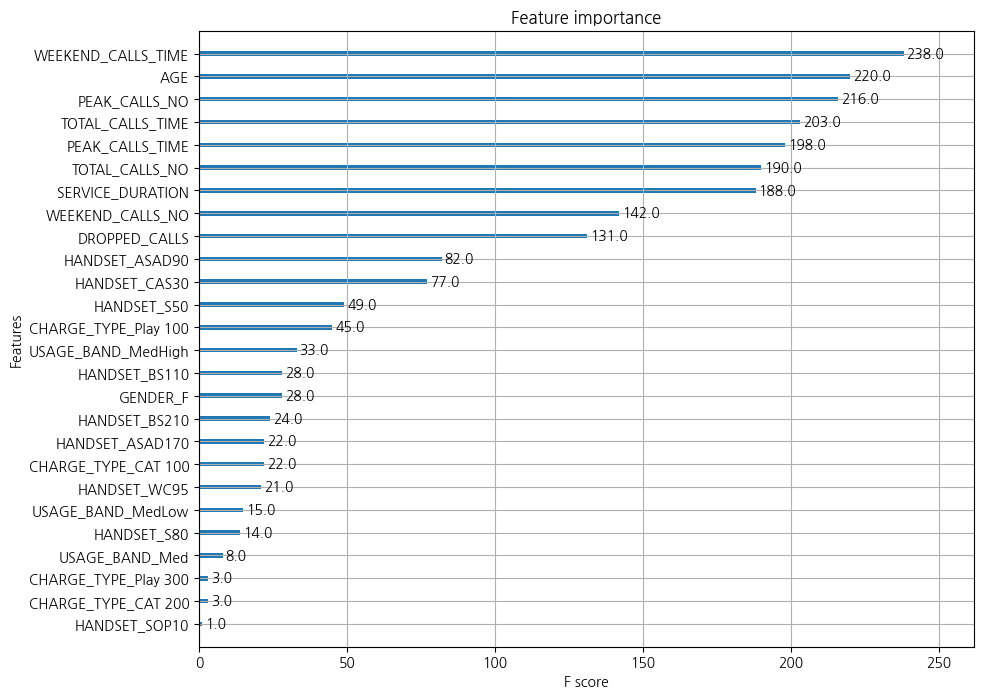

In [33]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

# 5. SVM (서포트 벡터 머신)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
df_raw = pd.read_csv('통신고객이탈.csv', encoding = 'euc-kr')
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [36]:
df_raw = df_raw.drop(columns=['CUSTOMER_ID'])
df_raw.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


### 5-1. 데이터 전처리

##### 5-1-1. 데이터 분리

In [37]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("CHURN", axis = 1, inplace = False)
df_raw_y = df_raw["CHURN"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'목표변수:'

0    Active
1    Active
2    Active
3    Active
4    Active
Name: CHURN, dtype: object

#### 5-1-2. 범주형 변수 -> 더미

In [38]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,F,CAT 100,ASAD170,Med
1,M,CAT 100,S50,Med
2,M,CAT 100,ASAD170,Med
3,M,CAT 100,ASAD170,Med
4,F,CAT 100,S50,Med


'Dummy 변환 후:'

,GENDER_F,GENDER_M,CHARGE_TYPE_CAT 100,CHARGE_TYPE_CAT 200,CHARGE_TYPE_CAT 50,CHARGE_TYPE_Play 100,CHARGE_TYPE_Play 300,HANDSET_ASAD170,HANDSET_ASAD90,HANDSET_BS110,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### 5-1-3. 연속형 변수 스케일링
- 결정경계로부터 마진을 최대로 하기위해서, 거리를 계산할 때, X변수의 스케일의 영향을 받는다. 따라서 X변수간의 스케일이 일정해야 거리를 구하는데 차이가 생기지 않으므로, StandardScaler로 각 X변수를 표준화시켜 주었다.

In [39]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,31,33.33,6,218,379.8,9,21.6,366,632.4
1,27,30.87,10,373,656.4,11,28.0,411,810.4
2,27,49.40,11,260,582.0,0,0.0,265,614.1
3,61,48.60,1,294,661.8,14,101.5,326,844.0
4,52,56.03,0,221,555.6,7,25.0,274,673.0


'Scale 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610


#### 5-1-4. 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형

In [40]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


'Scale/Dummy 변환 후:'

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030604,-0.069958,0.949112,-0.032834,-0.617357,-0.432263,-0.755024,0.079015,-0.783880,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.335827,-0.243451,2.091732,0.651830,-0.080674,-0.307456,-0.579614,0.259163,-0.458260,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.335827,1.063386,2.377387,0.152687,-0.225031,-0.993897,-1.347031,-0.325316,-0.817357,0,...,0,0,0,0,0,0,1,0,0,0
3,2.258568,1.006966,-0.479163,0.302872,-0.070196,-0.120245,1.434855,-0.081116,-0.396795,0,...,0,0,0,0,0,0,1,0,0,0
4,1.571816,1.530970,-0.764818,-0.019583,-0.276254,-0.557071,-0.661838,-0.289287,-0.709610,1,...,0,0,0,0,0,0,1,0,0,0


#### 5-1-5. Train / Test 데이터 분할

In [41]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 990829)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (651, 33)
분할된 Test Data: (279, 33)


### 5-2. 모델 생성 (SVM)

#### 5-2-1. 기본 모델

- 파라미터를 조정하지 않은 SVM모델의 경우 training data에 대한 정확도가 0.906, test data에 대한 정확도가 0.885로 나타났다.

In [42]:
svm_uncust = SVC(random_state=990829)
svm_uncust.fit(df_train_x, df_train_y)

print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.908
Test Accuracy : 0.821


In [44]:
print(svm_uncust.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 990829, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### 5-2-2. Cost 변경에 따른 성능 비교

- Train / Test 셋에서 정확도가 가장 높은 cost = 100 선택

In [45]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_c = [0.1 * c for c in range(1, 13)] )] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 990829)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [46]:
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.811,0.796
1,0.10,0.811,0.796
2,1.00,0.908,0.821
3,10.00,0.986,0.857
4,100.00,1.000,0.860


#### 5-2-3. Cost 값 미소 변화에 따른 성능 비교

In [47]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 990829)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [48]:
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.811,0.796
1,0.2,0.811,0.796
2,0.3,0.811,0.796
3,0.4,0.813,0.796
4,0.5,0.825,0.796
5,0.6,0.839,0.796
6,0.7,0.856,0.792
7,0.8,0.873,0.803
8,0.9,0.886,0.817
9,1.0,0.908,0.821


#### 5-3. Gamma 에 따른 성능 비교

- 정확도값이 기본모델보다 떨어져, Default를 유지

In [49]:
train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 3)]  
for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 990829)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.8111,0.7957
1,0.10,0.8833,0.8100
2,1.00,0.9677,0.7957
3,10.00,0.8111,0.7957
4,100.00,0.8111,0.7957


#### 5-3-1. Gamma 값 미세 변화에 따른 성능 비교

In [50]:

train_accuracy = []; test_accuracy = []

para_gamma = [0.1 * gamma for gamma in range(1, 11)]    

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 990829)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.8833,0.8100
1,0.2,0.9124,0.7957
2,0.3,0.9324,0.7993
3,0.4,0.9432,0.8065
4,0.5,0.9478,0.7957
5,0.6,0.9555,0.7957
6,0.7,0.9647,0.7957
7,0.8,0.9662,0.7957
8,0.9,0.9693,0.7957
9,1.0,0.9677,0.7957


### 5-4. 결론 도출 (SVM)

In [51]:
# 최종 모델
svc_final = SVC(C=100, random_state=990829)
svc_final.fit(df_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 1.000
Test Accuracy : 0.860

Test Confusion matrix: 
[[209  13]
 [ 26  31]]
              precision    recall  f1-score   support

      Active      0.889     0.941     0.915       222
     Churned      0.705     0.544     0.614        57

    accuracy                          0.860       279
   macro avg      0.797     0.743     0.764       279
weighted avg      0.852     0.860     0.853       279



#### 최적 SVM 분석 결과,

1. precision, recall, f1-score 각각  
 - 0 에 대해 0.889, 0.941, 0.915 
 - 1 에 대해 0.705, 0.544, 0.614으로 나타남
 - 기본 모델보다 Accuracy가 높아졌고, 1에 대한 예측 성능이 증가함
 
2. accuracy = 0.860

# 6. NN (인공신경망)

In [52]:
from sklearn.neural_network import MLPClassifier

### 6-1. 모델 생성

- 파라미터를 조정하지 않은 인공신경망 모델의 경우 training data에 대한 정확도가 0.966, test data에 대한 정확도가 0.875로 나타났다.

In [53]:
nn_uncust = MLPClassifier(random_state=990829)
nn_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(nn_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}".format(nn_uncust.score(df_test_x, df_test_y)))

Train Accuracy: 0.966
Test Accuracy: 0.875


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
print(nn_uncust.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 990829, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [55]:
nn_uncust2 = MLPClassifier(hidden_layer_sizes=(100,200), random_state=990829) # 은닉층 2개, 각 은닉층 노드 100개
nn_uncust2.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncust2.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncust2.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.878


### 6-2. 은닉층에 따른 모델 성능 비교

- Train / Test 셋에 대한 성능이 은닉층이 15일 때 가장 좋으므로 은닉층은 15개로 정하였다. 

In [56]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 990829) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-pac

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.922,0.889
1,10,0.937,0.871
2,15,0.946,0.878
3,20,0.969,0.864
4,25,0.983,0.878
5,30,0.994,0.860
6,35,0.989,0.864
7,40,0.998,0.846
8,45,0.995,0.853
9,50,0.998,0.871


### 6-3. 활성화 함수에 따른 성능 비활성화 함수에 따른 성능 비교

- Train / Test 셋에 대한 Tanh함수의 성능이 가장 좋은 것으로 나타나 활성화 함수는 Tanh를 선택하였다. 추가로 Relu 함수는 Train셋에 대하여 성능이 가장 좋게 나왔지만, test 셋에 대해 성능이 Tanh보다 떨어짐으로 보아 과적합됬음을 알 수 있다.

In [61]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes=(15,15), random_state = 990829)
#     nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state = 1234) # 변경 가능
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# Activation Function별 정확도 
df_accuracy_function.round(3)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.860,0.835
1,tanh,0.932,0.903
2,relu,0.946,0.878


### 6-3. Solver 에 따른 성능 비교

Train / Test 셋에 대한 adam의 성능이 가장 좋은 것으로 나타나 Solver를 adam으로 선택하였다. 
추가로 lbfgs는 Train 셋에 대하여 성능이 가장 좋게 나왔지만, test 셋에 대해 성능이 adam보다 떨어짐으로 보아 과적합됬음을 알 수 있다.

In [64]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="tanh", hidden_layer_sizes=(15,15), random_state = 990829)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy
df_accuracy_solver.round(3)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.849
1,sgd,0.813,0.796
2,adam,0.932,0.903


### 6-4. Minibatch 변경에 따른 성능 비교

- mini 배치의 수를 늘릴수록 Train 셋에 대한 과적합됨을 확인할 수 있다. 따라서 batch_size는 default값으로 결정하였다.

In [67]:
train_accuracy = []; test_accuracy = []

para_batch = [20 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "tanh", 
                       hidden_layer_sizes = (15,15), random_state = 990829)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy
df_accuracy_batch.round(3)

[20, 40, 60, 80, 100, 120, 140, 160, 180]


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-pac

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,0.998,0.864
1,40,0.985,0.864
2,60,0.969,0.871
3,80,0.940,0.882
4,100,0.943,0.878
5,120,0.940,0.885
6,140,0.937,0.885
7,160,0.929,0.903
8,180,0.934,0.892


### 6-5. 결론 도출

In [69]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(15, 15), activation="tanh", solver="adam",random_state = 990829)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.932
Test Accuracy : 0.903

Test Confusion Matrix: 
[[214   8]
 [ 19  38]]
              precision    recall  f1-score   support

      Active      0.918     0.964     0.941       222
     Churned      0.826     0.667     0.738        57

    accuracy                          0.903       279
   macro avg      0.872     0.815     0.839       279
weighted avg      0.900     0.903     0.899       279



/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### NN (인공신경망) 분석 결과,

1. precision, recall, f1-score 각각  
 - 0 에 대해 0.918, 0.964, 0.941 
 - 1 에 대해 0.826, 0.667, 0.713으로 나타남
 - 기본 모델보다 Accuracy가 높아졌고, 1에 대한 예측 성능이 증가함
 
2. accuracy =  
Train Accuracy = 0.932  
Test Accuracy = 0.903

# ** 최종 결론 (모델별 비교)

In [133]:
# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# Check the Frequency of Variable
from collections import Counter
model = [ "GradientBoosting", "XGB", "SVM", "NeuralNet"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

In [134]:
df_train_x

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
812,-1.022579,-1.244913,1.806077,-0.801425,-1.127264,-0.931493,0.757884,0.539393,0.197370,0,...,0,0,0,0,0,0,1,0,0,0
404,-0.717356,1.472434,-0.193508,0.099681,-0.368224,-0.806686,-0.228795,-0.229237,-0.727354,1,...,0,0,0,1,0,0,1,0,0,0
905,-1.175190,-0.264609,3.234352,-0.713081,-0.171479,0.628600,-0.163017,-1.025890,-0.746562,0,...,0,0,1,0,0,0,1,0,0,0
927,0.122007,0.748137,2.663042,-0.227191,-0.798967,0.566197,0.489288,0.999770,-0.040077,1,...,0,0,0,0,0,0,1,0,0,0
266,0.198313,-1.036158,0.663457,-0.947192,-1.174995,-0.806686,-1.182585,-1.254078,-1.635614,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,-0.030604,-1.468479,-0.479163,0.126184,1.508420,1.751868,0.576992,1.171911,1.897545,1,...,0,0,0,0,1,0,0,0,0,0
713,-1.327802,0.818663,-0.764818,-0.982530,-1.300725,-0.993897,-1.347031,-0.177195,-0.894738,1,...,0,0,0,0,0,0,1,0,0,0
926,2.105956,-1.195545,3.520007,-0.633572,-1.101652,-0.245052,-0.639911,0.042986,-0.750404,1,...,0,0,1,0,0,0,1,0,0,0
185,-0.412133,-1.287228,-0.764818,0.536983,-0.227359,0.004563,-0.168498,1.123872,0.223895,0,...,0,0,0,0,0,0,1,0,0,0


In [135]:
df_train_y[df_train_y == 'Churned']=1
df_train_y[df_train_y == 'Active']=0
df_test_y[df_test_y == 'Churned']=1
df_test_y[df_test_y == 'Active']=0

In [136]:
df_test_y=df_test_y.astype(int)
df_train_y=df_train_y.astype(int)

### 1. Gradient Boosting

#### Gradient Boosting 분석 결과,

1. precision, recall, f1-score 각각  
 - 0 에 대해 0.906, 0.950, 0.927  
 - 1 에 대해 0.761, 0.614, 0.680 
 으로 나타났다.
 - 이는 모델이 0에 대해서는 잘 예측하고 맞추는 반면, 1에 대해서는 비교적 예측성능이 떨어진다는 것으로 보이는 듯하다. 그러나 이는 모델이 불균형 데이터를 학습하여, 0으로 예측하는 경향이 커졌기 때문일 수 있다. 따라서 1에 대한 모델의 예측 성능이 개선될수록 0에 대한 예측성능은 낮아질 가능성이 있다.
 
2. accuracy = 0.882
- 전체의 0, 1을 약 88%으로 확률로 모델이 잘 구분하는 것을 알 수 있다.

In [137]:
gb_final = GradientBoostingClassifier(min_samples_leaf=5, min_samples_split=80,  max_depth=6, n_estimators=60, learning_rate=0.7, 
                                      random_state=990829)
gb_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = gb_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = gb_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[211  11]
 [ 22  35]] 

              precision    recall  f1-score   support

           0      0.906     0.950     0.927       222
           1      0.761     0.614     0.680        57

    accuracy                          0.882       279
   macro avg      0.833     0.782     0.804       279
weighted avg      0.876     0.882     0.877       279



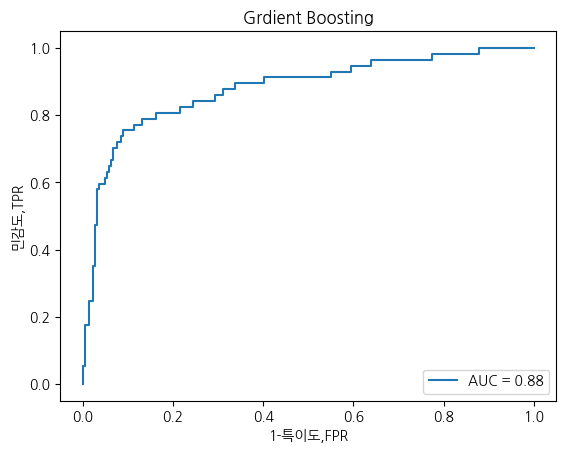

In [138]:
plt.title("Grdient Boosting")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [139]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.679611650485437]

### 2. XG BOOST

#### XG BOOST 분석 결과,

1. precision, recall, f1-score 각각  
 - 0 에 대해 0.90, 0.960, 0.93  
 - 1 에 대해 0.80, 0.56, 0.66 
 으로 나타났다.
 
2. accuracy = 0.882
- 전체의 0, 1을 약 88%으로 확률로 모델이 잘 구분하는 것을 알 수 있다.

In [140]:
xgb_final = xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=990829)
xgb_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(xgb_final.score(df_train_x, df_train_y))
test_accuracy.append(xgb_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = xgb_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = xgb_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[212  10]
 [ 23  34]] 

              precision    recall  f1-score   support

           0      0.902     0.955     0.928       222
           1      0.773     0.596     0.673        57

    accuracy                          0.882       279
   macro avg      0.837     0.776     0.801       279
weighted avg      0.876     0.882     0.876       279



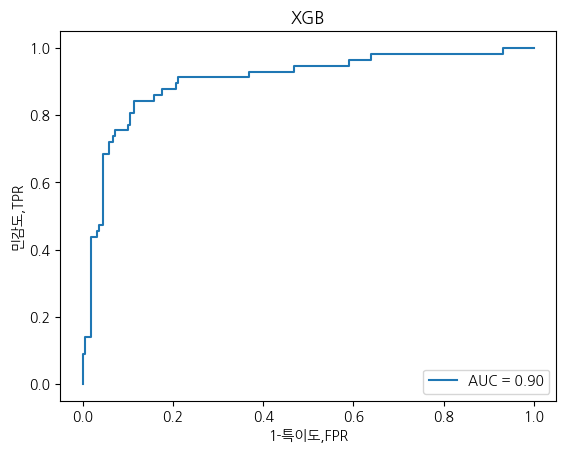

In [141]:
plt.title("XGB")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [142]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.679611650485437, 0.6732673267326733]

### 3. SVM

#### SVM 분석 결과,

1. precision, recall, f1-score 각각  
 - 0 에 대해 0.889, 0.941, 0.915 
 - 1 에 대해 0.705, 0.544, 0.614으로 나타남
 - 기본 모델보다 Accuracy가 높아졌고, 1에 대한 예측 성능이 증가함
 
2. accuracy = 0.860

In [143]:
svc_final = SVC(C=100, probability=True, random_state=990829)
svc_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(svc_final.score(df_train_x, df_train_y))
test_accuracy.append(svc_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = svc_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = svc_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[209  13]
 [ 26  31]] 

              precision    recall  f1-score   support

           0      0.889     0.941     0.915       222
           1      0.705     0.544     0.614        57

    accuracy                          0.860       279
   macro avg      0.797     0.743     0.764       279
weighted avg      0.852     0.860     0.853       279



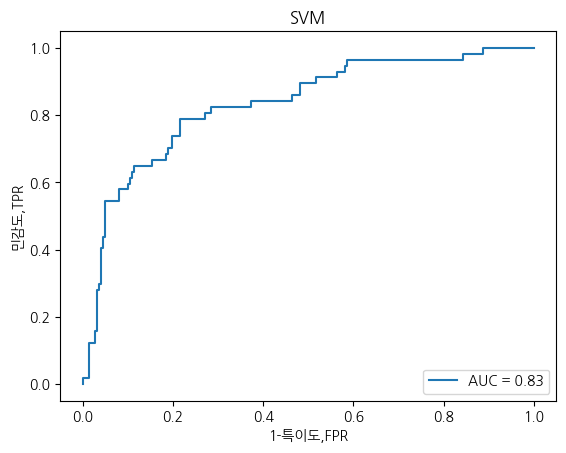

In [144]:
plt.title("SVM")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [145]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.679611650485437, 0.6732673267326733, 0.613861386138614]

### 4. NN (인공신경망)

#### NN (인공신경망) 분석 결과,

1. precision, recall, f1-score 각각  
 - 0 에 대해 0.918, 0.964, 0.941 
 - 1 에 대해 0.826, 0.667, 0.713으로 나타남
 - 기본 모델보다 Accuracy가 높아졌고, 1에 대한 예측 성능이 증가함
 
2. accuracy =  
Train Accuracy = 0.932  
Test Accuracy = 0.903

In [146]:
nn_final = MLPClassifier(hidden_layer_sizes=(80, 80), activation="relu", solver="adam", random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 정확도
train_accuracy.append(nn_final.score(df_train_x, df_train_y))
test_accuracy.append(nn_final.score(df_test_x, df_test_y))

# 예측값
y_prob_1 = nn_final.predict_proba(df_test_x)[:, 1]  # 1 발생 확률
y_pred = nn_final.predict(df_test_x)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[208  14]
 [ 21  36]] 

              precision    recall  f1-score   support

           0      0.908     0.937     0.922       222
           1      0.720     0.632     0.673        57

    accuracy                          0.875       279
   macro avg      0.814     0.784     0.798       279
weighted avg      0.870     0.875     0.871       279



/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


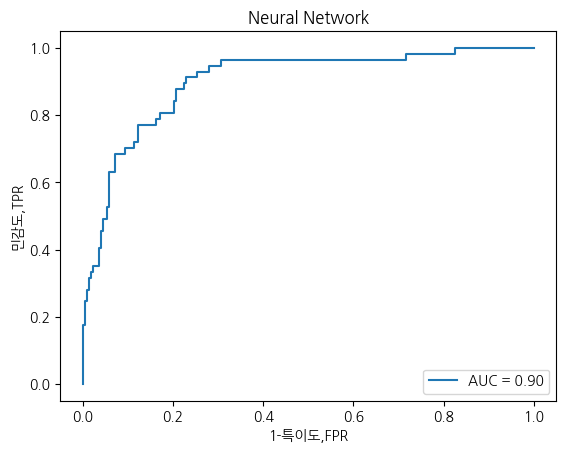

In [147]:
plt.title("Neural Network")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

In [148]:
# precision, recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))
model_f1_score

[0.679611650485437, 0.6732673267326733, 0.613861386138614, 0.6728971962616822]

### 5. 최적 알고리즘 선정

- 4가지의 모델비교 결과 Test Accuracy에 대해선 0.882로 GB, XGB가 가장 높은 것으로 나타났고, AUC는 XGB 모델이 가장 높은 값을 가진 것으로 나타났다.
- 또한 Precision은 0.773으로 XGB가 가장 높았으며, Recall에 대해선 NeuralNet이 0.632로 가장 높은 성능을 보였다. 마지막으로 F1Score에 대해선 GB의 성능이 가장 좋은 것으로 나타났다.
- 목적에 따라 어떤 모델이 쓰일지 정할 수 있지만, 보편적인 문제에서 XGB의 성능이 가장 좋을 것으로 생각된다(Test Accuracy, AUC, Precision의 지표가 가장 높은 값을 가짐, 또한 Recall, F1Score 지표도 타 모델과 비교하여 평균정도의 성능을 보임)

In [151]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy ; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score

df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
GradientBoosting,1.0,0.882,0.879,0.761,0.614,0.680
XGB,1.0,0.882,0.904,0.773,0.596,0.673
SVM,1.0,0.860,0.833,0.705,0.544,0.614
NeuralNet,1.0,0.875,0.901,0.720,0.632,0.673


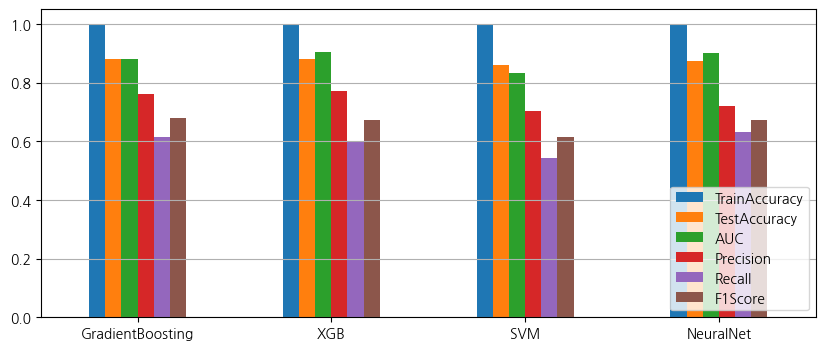

In [152]:
df_eval.plot.bar(rot = 0, figsize=(10,4))
plt.legend(loc="lower right")
plt.grid(axis = "y")